# Income Classification Model

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('adult.data',sep=',',names=['age','workclass','fnlwgt','education','education_num','martial_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary'])
df

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Finding "?" noise in data from columns

In [6]:
df.workclass.value_counts() #? value

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [7]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [8]:
df.martial_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: martial_status, dtype: int64

In [9]:
df.occupation.value_counts() #?

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
df.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [11]:
df.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [12]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [13]:
df.native_country.value_counts() #?

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [14]:
df.salary.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

# Data Cleaning

There are three columns who has noise("?"):
'workclass','occupation','native_country'

In [15]:
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)
df['native_country'] = df['native_country'].replace(' ?',np.nan)

In [16]:
#dropping the NaN rows now
df.dropna(how='any',inplace=True)
df.shape

(30162, 15)

# Exploratory Data Analysis

<AxesSubplot:>

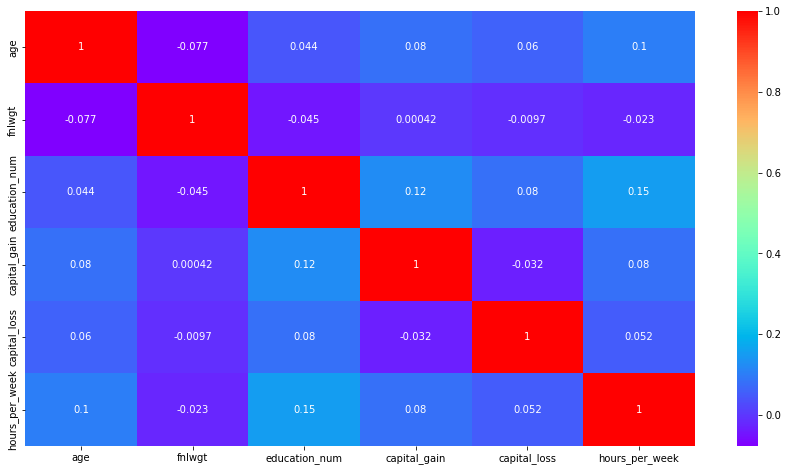

In [17]:
#Showing correlation among all.
plt.subplots(figsize=(15,8))

sns.heatmap(df.corr(),annot=True,cmap='rainbow')

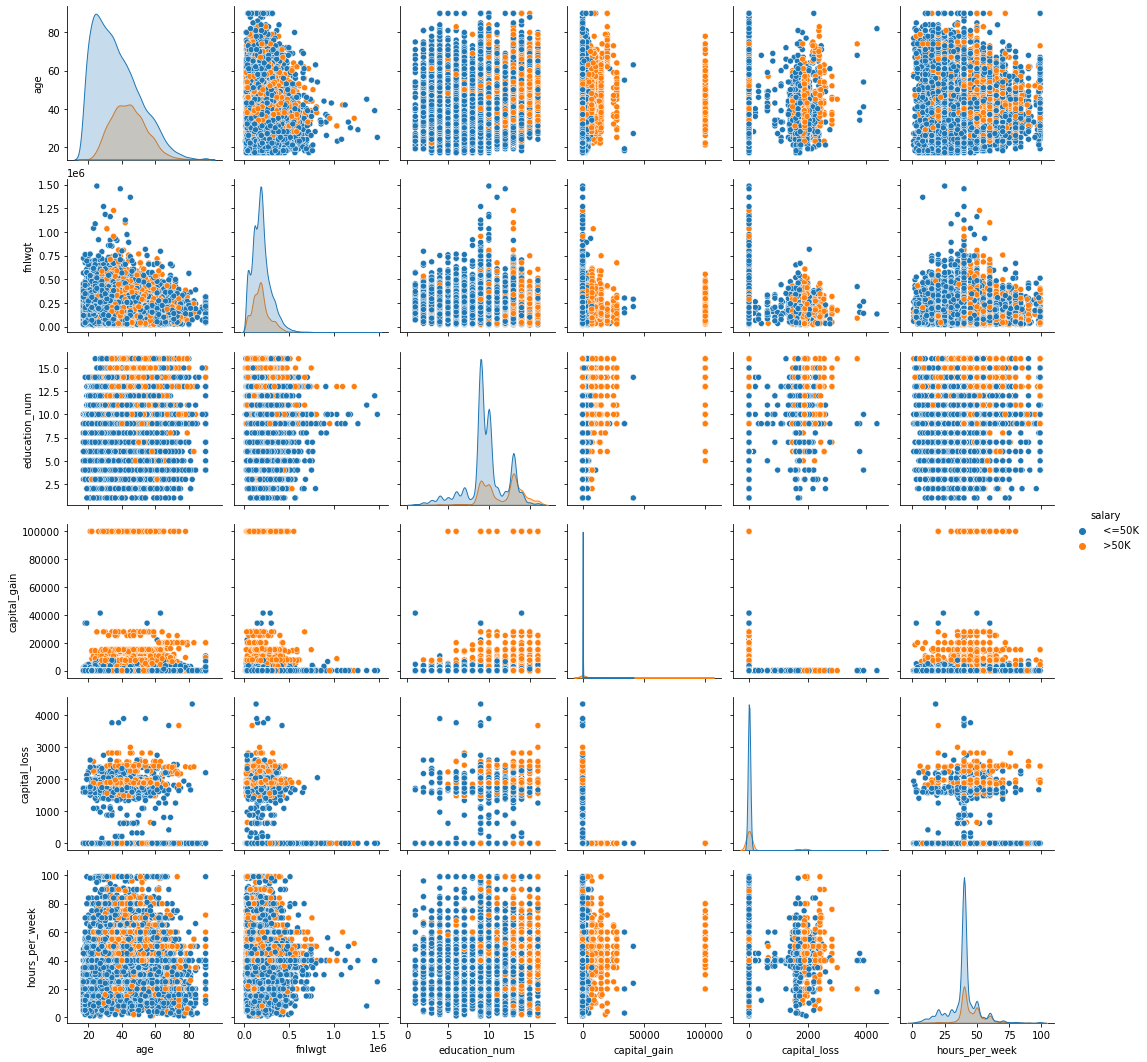

In [54]:
#Showing Outcome relation with other columns
sns.pairplot(df,hue='salary')

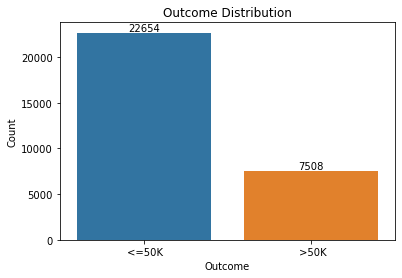

In [55]:
# Outcome Distribution
ax = sns.countplot(data=df, x='salary')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Add labels and title to the plot
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary Distribution')

# Display the plot
plt.show()

<AxesSubplot:xlabel='workclass'>

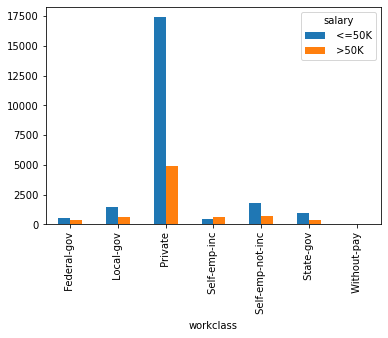

In [56]:
y = pd.crosstab(df.workclass, df.salary)
#print(y)
y.plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

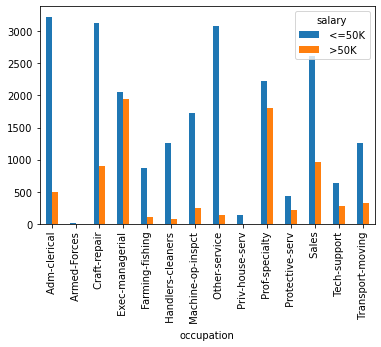

In [57]:
y = pd.crosstab(df.occupation, df.salary)
#print(y)
y.plot(kind='bar')

<AxesSubplot:xlabel='education'>

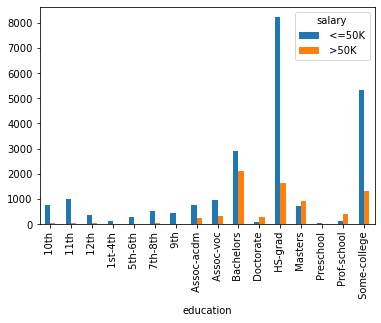

In [58]:
y = pd.crosstab(df.education, df.salary)
#print(y)
y.plot(kind='bar')

# Feature Engineering

In [18]:
df['workclass']=pd.factorize(df['workclass'])[0]
df['education']=pd.factorize(df['education'])[0]
df['martial_status']=pd.factorize(df['martial_status'])[0]
df['occupation']=pd.factorize(df['occupation'])[0]
df['relationship']=pd.factorize(df['relationship'])[0]
df['race']=pd.factorize(df['race'])[0]
df['sex']=pd.factorize(df['sex'])[0]
df['native_country']=pd.factorize(df['native_country'])[0]
df['salary']=pd.factorize(df['salary'])[0]
df

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,1,9,2,0,1,0,0,38,0,0
32557,40,2,154374,1,9,1,8,1,0,0,0,0,40,0,1
32558,58,2,151910,1,9,6,0,4,0,1,0,0,40,0,0
32559,22,2,201490,1,9,0,0,3,0,0,0,0,20,0,0


# Machine Learning Models

In [19]:
#from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [20]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(7),
#   SVC(kernel="linear", C=1),
    SVC(gamma=2, C=1),
#   GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(criterion='gini',max_depth=4),
    RandomForestClassifier(criterion='gini',max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]


X = df[['age', 'workclass','education','occupation','hours_per_week']] #I have only used 5 features
y = df['salary']
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("For "+name+", Accuracy: "+str(score))

For Nearest Neighbors, Accuracy: 0.7687309375414402
For Linear SVM, Accuracy: 0.7627635592096539
For RBF SVM, Accuracy: 0.7834504707598462
For Decision Tree, Accuracy: 0.7733722317994961
For Random Forest, Accuracy: 0.7723113645405119
For Neural Net, Accuracy: 0.796843919904522
